In [2]:
#import all libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = "C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/JustRAIGS_Train_labels.csv"

In [4]:
df = pd.read_csv(data_path, sep=';', low_memory=False)
df

,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
0,TRAIN000000,NRG,TRAIN081848,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN000001,NRG,TRAIN018312,29.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN000002,NRG,TRAIN083822,61.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN000003,NRG,TRAIN055721,70.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN000004,NRG,TRAIN099283,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101418,TRAIN101437,NRG,TRAIN096656,57.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101419,TRAIN101438,NRG,TRAIN078075,52.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101420,TRAIN101439,NRG,TRAIN056754,49.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101421,TRAIN101440,NRG,TRAIN040796,44.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


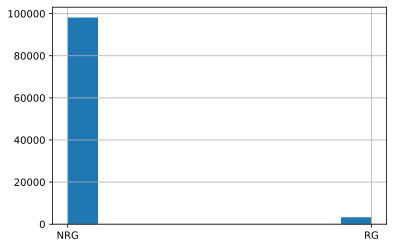

None

In [5]:
df["Final Label"].hist()
display(plt.show())

As we can see above, there is a big class imbalance above, hence our evaluation metric should also take that into account

Eye ID            object
Final Label        int64
Fellow Eye ID     object
Age              float64
Label G1           int64
Label G2           int64
Label G3           int64
G1 ANRS            int64
G1 ANRI            int64
G1 RNFLDS          int64
G1 RNFLDI          int64
G1 BCLVS           int64
G1 BCLVI           int64
G1 NVT             int64
G1 DH              int64
G1 LD              int64
G1 LC              int64
G2 ANRS            int64
G2 ANRI            int64
G2 RNFLDS          int64
G2 RNFLDI          int64
G2 BCLVS           int64
G2 BCLVI           int64
G2 NVT             int64
G2 DH              int64
G2 LD              int64
G2 LC              int64
G3 ANRS            int64
G3 ANRI            int64
G3 RNFLDS          int64
G3 RNFLDI          int64
G3 BCLVS           int64
G3 BCLVI           int64
G3 NVT             int64
G3 DH              int64
G3 LD              int64
G3 LC              int64
dtype: object


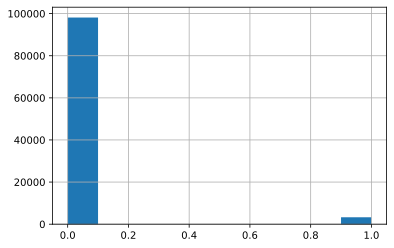

In [24]:
col = ['Eye ID', 'Final Label', 'Fellow Eye ID', 'Age', 'Label G1', 'Label G2',
       'Label G3', 'G1 ANRS', 'G1 ANRI', 'G1 RNFLDS', 'G1 RNFLDI', 'G1 BCLVS',
       'G1 BCLVI', 'G1 NVT', 'G1 DH', 'G1 LD', 'G1 LC', 'G2 ANRS', 'G2 ANRI',
       'G2 RNFLDS', 'G2 RNFLDI', 'G2 BCLVS', 'G2 BCLVI', 'G2 NVT', 'G2 DH',
       'G2 LD', 'G2 LC', 'G3 ANRS', 'G3 ANRI', 'G3 RNFLDS', 'G3 RNFLDI',
       'G3 BCLVS', 'G3 BCLVI', 'G3 NVT', 'G3 DH', 'G3 LD', 'G3 LC']
to_binary = [ 'Label G1', 'Label G2', 'Label G3', 'Final Label']
df[to_binary] = df[to_binary].replace({'RG': 1, 'NRG': 0, 'U' : 69420})
df['Final Label'].hist()

num = ['Final Label', 'Label G1', 'Label G2',
       'Label G3', 'G1 ANRS', 'G1 ANRI', 'G1 RNFLDS', 'G1 RNFLDI', 'G1 BCLVS',
       'G1 BCLVI', 'G1 NVT', 'G1 DH', 'G1 LD', 'G1 LC', 'G2 ANRS', 'G2 ANRI',
       'G2 RNFLDS', 'G2 RNFLDI', 'G2 BCLVS', 'G2 BCLVI', 'G2 NVT', 'G2 DH',
       'G2 LD', 'G2 LC', 'G3 ANRS', 'G3 ANRI', 'G3 RNFLDS', 'G3 RNFLDI',
       'G3 BCLVS', 'G3 BCLVI', 'G3 NVT', 'G3 DH', 'G3 LD', 'G3 LC']
#make th columns in the list num as int64 if not nan
for i in num:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].fillna(0).astype(np.int64)

print(df.dtypes)

In [25]:

df_agreed = df[df['Label G1'] == df['Label G2']].copy()
df_agreed

,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
0,TRAIN000000,0,TRAIN081848,48.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAIN000001,0,TRAIN018312,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TRAIN000002,0,TRAIN083822,61.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TRAIN000003,0,TRAIN055721,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TRAIN000004,0,TRAIN099283,48.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101418,TRAIN101437,0,TRAIN096656,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101419,TRAIN101438,0,TRAIN078075,52.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101420,TRAIN101439,0,TRAIN056754,49.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101421,TRAIN101440,0,TRAIN040796,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#create a new dataframe to store the agreed values

df_agreed_final = pd.DataFrame()
for i in range (4):
    df_agreed_final[col[i]] = df_agreed[col[i]].copy()

for i in range (10):
    df_agreed_final[col[i+7]] = df_agreed[num[i+4]] & df_agreed[num[i+14]]

df_agreed_final

0
1
2
3
4
5
6
7
8
9


,Eye ID,Final Label,Fellow Eye ID,Age,G1 ANRS,G1 ANRI,G1 RNFLDS,G1 RNFLDI,G1 BCLVS,G1 BCLVI,G1 NVT,G1 DH,G1 LD,G1 LC
0,TRAIN000000,0,TRAIN081848,48.0,0,0,0,0,0,0,0,0,0,0
1,TRAIN000001,0,TRAIN018312,29.0,0,0,0,0,0,0,0,0,0,0
2,TRAIN000002,0,TRAIN083822,61.0,0,0,0,0,0,0,0,0,0,0
3,TRAIN000003,0,TRAIN055721,70.0,0,0,0,0,0,0,0,0,0,0
4,TRAIN000004,0,TRAIN099283,48.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101418,TRAIN101437,0,TRAIN096656,57.0,0,0,0,0,0,0,0,0,0,0
101419,TRAIN101438,0,TRAIN078075,52.0,0,0,0,0,0,0,0,0,0,0
101420,TRAIN101439,0,TRAIN056754,49.0,0,0,0,0,0,0,0,0,0,0
101421,TRAIN101440,0,TRAIN040796,44.0,0,0,0,0,0,0,0,0,0,0


In [44]:
df_not_agreed = df[df['Label G1'] != df['Label G2']].copy()
df_na_corr = df_not_agreed.corr(numeric_only=True)
df_not_agreed


,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
11,TRAIN000011,0,TRAIN061398,50.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
57,TRAIN000057,0,TRAIN018238,53.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
65,TRAIN000065,0,NaN,74.0,0,69420,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,TRAIN000068,1,TRAIN012581,64.0,1,0,1,1,1,0,...,1,1,0,0,1,0,1,0,0,1
69,TRAIN000069,0,TRAIN041674,80.0,0,69420,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101390,TRAIN101409,0,TRAIN069678,54.0,1,69420,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
101397,TRAIN101416,0,TRAIN068490,68.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101404,TRAIN101423,0,TRAIN071236,61.0,69420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101405,TRAIN101424,0,TRAIN035938,56.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#iterate through df_not_agreed data points
df_not_agreed_final = pd.DataFrame(index = range(7423), columns = ['Eye ID', 'Final Label', 'Fellow Eye ID', 'Age',"G1 ANRS","G1 ANRI","G1 RNFLDS","G1 RNFLDI","G1 BCLVS","G1 BCLVI","G1 NVT","G1 DH","G1 LD","G1 LC"])
columns = ['Eye ID', 'Final Label', 'Fellow Eye ID', 'Age',"G1 ANRS","G1 ANRI","G1 RNFLDS","G1 RNFLDI","G1 BCLVS","G1 BCLVI","G1 NVT","G1 DH","G1 LD","G1 LC"]
for i in range(4):
    for j in range(len(df_not_agreed)):
        df_not_agreed_final.iloc[j][columns[i]] = df_not_agreed.iloc[j][columns[i]]
for i in range (len(df_not_agreed)):
    if df_not_agreed.iloc[i]['Label G1'] == df_not_agreed.iloc[i]['Label G3']:
        for j in range (10):
            df_not_agreed_final.iloc[i][col[j+7]] = df_not_agreed.iloc[i][num[j+4]] & df_not_agreed.iloc[i][num[j+24]]
    elif df_not_agreed.iloc[i]['Label G2'] == df_not_agreed.iloc[i]['Label G3']:
        for j in range (10):
            df_not_agreed_final.iloc[i][col[j+7]] = df_not_agreed.iloc[i][num[j+14]] & df_not_agreed.iloc[i][num[j+24]]
    else:
        for j in range (10):
            df_not_agreed_final.iloc[i][col[j+7]] = df_not_agreed.iloc[i][num[j+24]]

In [78]:
df_not_agreed_final
df_not_agreed_final.to_csv('C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/trash.csv')

In [80]:
df_final = pd.concat([df_agreed_final, df_not_agreed_final])
df_final.to_csv('C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/final.csv')

In [58]:
corr= df.corr(numeric_only=True)
# print(corr)
print(df[1].corr(df[3]))

KeyError: 1

<Axes: >

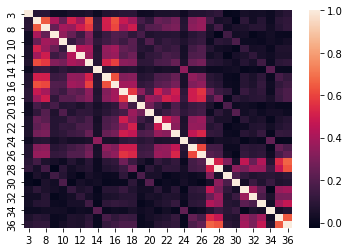

In [17]:
sns.heatmap(corr)

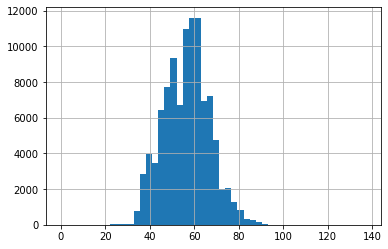

None

In [18]:
#plot the distribution of age with buckets 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-90
df[3].hist(bins=50)
display(plt.show())

In [22]:

shared_features = [7,8,9,10,11,12,13,14,15,16]
g1_g3_differences = df_not_agreed[[metric for metric in shared_features]]-(df_not_agreed[[metric+20 for metric in shared_features]].values)
g2_g3_differences = df_not_agreed[[metric+10 for metric in shared_features]]-(df_not_agreed[[metric+20 for metric in shared_features]].values)

for i in g1_g3_differences:
    i=np.absolute(i)

for i in g2_g3_differences:
    i=np.absolute(i)

g1_g3_avg_diff = g1_g3_differences.mean()
g2_g3_avg_diff = g2_g3_differences.mean()

print(g1_g3_avg_diff.mean())
print(g2_g3_avg_diff.mean())

0.06844499078057775
0.020804891922639363


**Inference**
We compare the outcomes of G1 and G2 with G3 to study which of the first two classifiers is closer to G3. When G1 and G2 are in agreement, however have different features, we take the features of the one closer to G3 ingeneral since it is given that G3 is a better classifier.

In [24]:
columns_agreed = [5,17,18,19,20,21,22,23,24,25]
columns_not_agreed = [6,27,28,29,30,31,32,33,34,35]

# df_agreed_g2 = df_agreed[[0,1,2,3] + columns_agreed]
df_agreed_g2 = df_agreed[[0,1,2,3]]
# df_not_agreed_g3 = df_not_agreed[[0,1,2,3] + columns_not_agreed]
df_not_agreed_g3 = df_not_agreed[[0,1,2,3]]
for i in range(1,len(columns_agreed)):
    df_agreed_g2[columns_agreed[i]]=df[columns_agreed[i]] & df[columns_agreed[i-10]]

df_not_agreed_g3 = df_not_agreed_g3.rename(columns={6:5, 26:16, 27:17, 28:18, 29:19, 30:20, 31:21, 32:22, 33:23, 34:24, 35:25, 36:26})

df_agreed_g2_g3 = df_agreed_g2.append(df_not_agreed_g3)
df_agreed_g2_g3

/var/folders/p_/fqmvngrd2pv82zqprj57m9w00000gn/T/ipykernel_59429/479106993.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agreed_g2_g3 = df_agreed_g2.append(df_not_agreed_g3)


,0,1,2,3,5,16,17,18,19,20,21,22,23,24,25
1,TRAIN000000,NRG,TRAIN081848,48.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN000001,NRG,TRAIN018312,29.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN000002,NRG,TRAIN083822,61.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN000003,NRG,TRAIN055721,70.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,TRAIN000004,NRG,TRAIN099283,48.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101391,TRAIN101409,NRG,TRAIN069678,54.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101398,TRAIN101416,NRG,TRAIN068490,68.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101405,TRAIN101423,NRG,TRAIN071236,61.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101406,TRAIN101424,NRG,TRAIN035938,56.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#put df_agreed_g2_g3 into a csv file
df_agreed_g2_g3.to_csv('C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/JustRAIGS_Train_labels_agreed_g2_g3.csv', index=False, header=False)


OSError: Cannot save file into a non-existent directory: 'C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project'

In [15]:
df_agreed_g2_g3.describe()

,3,16,17,18,19,20,21,22,23,24,25
count,101409.000000,100046.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000
mean,56.675098,0.016263,0.021908,0.023890,0.003264,0.004023,0.006626,0.007286,0.008213,0.001085,0.012177
std,10.200041,0.126484,0.146385,0.152707,0.057035,0.063298,0.081129,0.085049,0.090254,0.032915,0.109675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,137.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


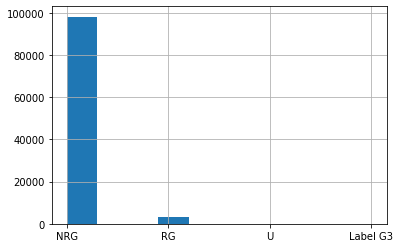

None

In [16]:
#check for class imbalance in df_agreed_g2_g3
df_agreed_g2_g3[5].hist()
display(plt.show())

In [192]:
#add count of all instances where column index 1 and column index 5 are not the same
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] != df_agreed_g2_g3.loc[i,5] and  df_agreed_g2_g3.loc[i,1] == "RG":
        ct += 1
print(ct)
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] != df_agreed_g2_g3.loc[i,5] and  df_agreed_g2_g3.loc[i,1] == "NRG":
        ct += 1
print(ct)
#count number of RGs in final label
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] == "RG":
        ct += 1
print(ct)
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,5] == "RG":
        ct += 1
print(ct)

86
190
3270
3184
